# Rapport de Projet 1 : Estimation de densité
# Etudiants
##  Dargel Florian - 
## Wajih Benrissoul - 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Question 1 : Generer les echantillons
moyenne = -1.5
variance = 2
taille = 50
premierEchantillon = np.random.normal(loc=moyenne,scale=math.sqrt(variance),size=taille)

deuxiemeEchantillon = np.random.uniform(high=1,low=0,size=taille)

X = np.concatenate((premierEchantillon,deuxiemeEchantillon))


(array([ 1.,  1.,  1.,  6.,  5., 14., 13., 39., 19.,  1.]),
 array([-6.26665954, -5.39270076, -4.51874198, -3.6447832 , -2.77082442,
        -1.89686564, -1.02290687, -0.14894809,  0.72501069,  1.59896947,
         2.47292825]),
 <a list of 10 Patch objects>)

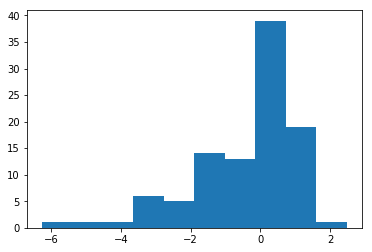

In [3]:
# Question 2.a
plt.hist(X)

In [5]:
def methodeNoyaux(noyau,X,h,x) :
    """
    Calcule la valeur l'estimateur à noyau pour un noyau donné,
    pour un jeu de variables aléatoire X donné
    et une fenetre h donné au point x
    """
    n = len(X)
    res = 0
    for i in range(n):
        res = res + noyau((X[i]-x)/h)
    return res/(n*h)

def noyauGaussien(x):
    local = math.sqrt(2*math.pi)
    local = 1/local
    local = local*math.exp(-((x**2)/2))
    return local

def noyauRectangulaire(x):
    if (-1<x<1):
        return 0.5
    else :
        return 0

# Question 2.b
On trace l'estimateur de la densité pour des valeurs différentes de la fenêtre h sur l'intervalle [-4,1] en évaluant l'estimateur en 100 points uniformément distribués sur cet intervalle pour les noyaux gaussien et rectangulaire en utilisant les fonctions methodeNoyaux , noyauGaussien, noyauRectangulaire qu'on a défini sur la cellule ci-dessus. 

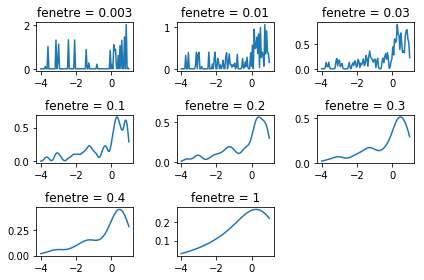

In [16]:
# L'estimateur à noyau gaussien
minimum = -4
maximum = 1
T = np.linspace(start=minimum,stop=maximum,num=100)
nn= len(T)
hlist = [0.003,0.01,0.03,0.1,0.2,0.3,0.4,1]
indice = 1
for h in hlist:
    
    fX = np.zeros(nn)
    for i in range(nn):
        fX[i] = methodeNoyaux(noyauGaussien,X,h,T[i])
    plt.subplot(3,3,indice)
    plt.plot(T,fX)
    plt.title('fenetre = '+str(h))
    indice = indice + 1
plt.tight_layout()

Comme les valeurs de l'échantillon sont aléatoires, on trouve une valeur de **h optimisée à la main pour le noyau gaussien dans les environs de [0.3 ,0.4]**

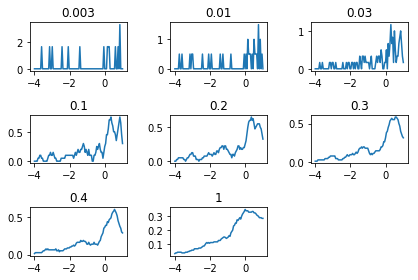

In [17]:
# L'estimateur à noyau rectangulaire
minimum = -4
maximum = 1
T = np.linspace(start=minimum,stop=maximum,num=100)
nn= len(T)
hlist = [0.003,0.01,0.03,0.1,0.2,0.3,0.4,1]
indice = 1
for h in hlist:
    
    fX = np.zeros(nn)
    for i in range(nn):
        fX[i] = methodeNoyaux(noyauRectangulaire,X,h,T[i])
    plt.subplot(3,3,indice)
    plt.plot(T,fX)
    plt.title(h)
    indice = indice + 1
plt.tight_layout()

Comme les valeurs de l'échantillon sont aléatoires, on trouve une valeur de **h optimisée à la main pour le noyau rectangulaire dans les environs de [0.3 ,0.4]**

# Question 2.c

La construction de l'estimateur optimal en utilisant la technique de validation croisée requiert le calcul d'une intégrale. Pour ce faire, on va utiliser la **méthode des trapèzes** mais adaptée à notre problématique. Rappelons d'abord la formule dans le cas général : 
$$\int_a^b f(x)\,dx \approx \frac{b-a}{n} \left( {f(a) + f(b) \over 2} + \sum_{k=1}^{n-1} f \left( a+k \frac{b-a}{n} \right) \right)  $$
Dans notre cas, on doit estimer  $\int \hat{f}^2$ avec $$\hat{f}(x) = \frac{1}{nh} \sum_{k=1}^{n} K\left(\frac{X_{i}-x}{h}\right)$$
On sait calculter cette quantité grâce à la fonction *methodeNoyaux* pour un x donné. Il ne reste plus qu'à calculer son carré pour les points $\frac{k*(b-a)}{n}$ qui figurent dans la méthode des trapèzes.
Dans ce qui suit, on se restreint au **noyau gaussien**.

In [18]:
# integrale par methode des trapèzes de l'estimateur au carré

def integraleTra(X,h,methodeNoyaux,noyau,minimum,maximum):
    compte = 100
    uu = np.linspace(start=minimum,stop=maximum,num=compte)
    n = compte-1 # en effet n points generent (n-1) intervalles
    local = (methodeNoyaux(noyau,X,h,minimum)**2 + methodeNoyaux(noyau,X,h,maximum)**2)/2
    for k in range(1,n):
        local = local + methodeNoyaux(noyau,X,h,k*(maximum-minimum)/n)**2
    return local*(maximum-minimum)/n
    

La fonction **fpriv** ci-dessous correspond à la fonction : $\hat{f}_{h,-i}$ vue au cours.
La fonction **Ghapeau** correspond à la fonction $$\hat{G} = \frac{1}{n} \sum_{i=1}^{n} \hat{f}_{h,-i}(X_{i})$$
Finalement la fonction Cvh correspond à 
$$Cv(h) = \int \hat{f}^2 - 2 \hat{G} $$

In [19]:
def fpriv(X,h,i,noyau,x):
    # i est entre 0 et n-1
    n = len(X)
    res = 0
    for j in range(n):
        if j == i :
            pass
        else:
            res = res + noyau((X[j]-x/h))
    return res/((n-1)*h)
    
    
def Gchapeau(X,h,noyau):
    n = len(X)
    res = 0
    for i in range(n):
        res = res + fpriv(X,h,i,noyau,X[i])
    return res/n

def Cvh(X,h,noyau,methodeNoyaux,minimum,maximum):
    return integraleTra(X,h,methodeNoyaux,noyau,minimum,maximum) - 2*Gchapeau(X,h,noyau)

On trace la courbe de $CV$ en calculant sa valeur sur des points uniformément répartis entre 0.01 et 1.

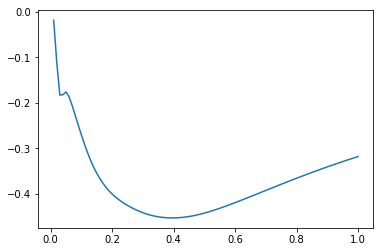

In [20]:

compte = 100
HH = np.linspace(0.01,1,num = compte)
CVH = np.zeros(compte)
noyau = noyauGaussien
minimum = -4
maximum = 1
indice = 0
for h in HH:
    CVH[indice] = Cvh(X,h,noyau,methodeNoyaux,minimum,maximum)
    indice = indice + 1
plt.plot(HH,CVH)

h optimal egale 0.4


Text(0.5,1,'estimation de la densite pour hopt = 0.4')

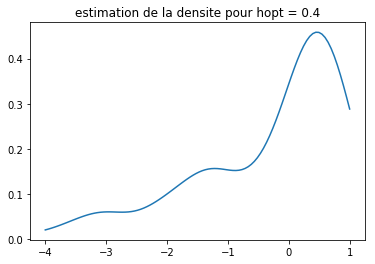

In [24]:
np.argmin(CVH)
h_optimal = HH[np.argmin(CVH)]
print('h optimal egale ' + str(h_optimal)) # On trouve des valeurs voisinant 0.4

T = np.linspace(start=minimum,stop=maximum,num=100)  
fX = np.zeros(nn)
for i in range(nn):
    fX[i] = methodeNoyaux(noyauGaussien,X,h_optimal,T[i])
    
plt.plot(T,fX)
plt.title('estimation de la densite pour hopt = '+ str(h_optimal))
    


# Question 2 : Données réelles

Comme plusieurs caractéristiques humaines, la taille suit une loi normale. On applique ainsi la méthodologie de la technique de validation croisée pour estimer la densité de la taille de Hommes. On s'est limité à un échantillon de 1000 hommes pour ne pas avoir une durée de traitement très longue. En effet, l'estimation du calcul de l'intégrale de $\hat{f}^2$ contient deux boucles imbriquées qui sont coûteuses. 

(array([  9.,  28.,  88., 193., 250., 230., 131.,  59.,  11.,   1.]),
 array([60.21701856, 62.09519094, 63.97336332, 65.85153569, 67.72970807,
        69.60788045, 71.48605283, 73.36422521, 75.24239759, 77.12056997,
        78.99874235]),
 <a list of 10 Patch objects>)

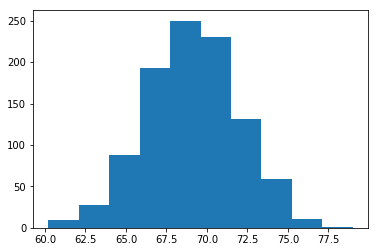

In [64]:
df = pd.read_csv('Projet1_weight-height.csv')
X = df['Height'].values
X = X[0:5000]
X = np.random.choice(X,size=1000,replace=False)
plt.hist(X)

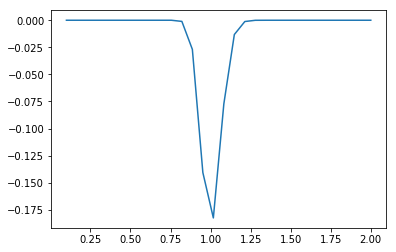

In [65]:
compte = 30
HH = np.linspace(0.1,2,num = compte)
CVH = np.zeros(compte)
noyau = noyauGaussien
minimum = int(np.nanmin(X)) - 2
maximum = int(np.nanmax(X)) + 2
indice = 0
for h in HH:
    CVH[indice] = Cvh(X,h,noyau,methodeNoyaux,minimum,maximum)
    indice = indice + 1
plt.plot(HH,CVH)

h optimal egale 1.0172413793103448


Text(0.5,1,'estimation de la densite pour hopt = 1.0172413793103448')

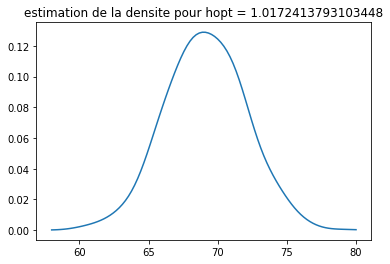

In [66]:
np.argmin(CVH)
h_optimal = HH[np.argmin(CVH)]
print('h optimal egale ' + str(h_optimal)) # On trouve des valeurs voisinant 1

T = np.linspace(start=minimum,stop=maximum,num=100)  
fX = np.zeros(nn)
for i in range(nn):
    fX[i] = methodeNoyaux(noyauGaussien,X,h_optimal,T[i])
    
plt.plot(T,fX)
plt.title('Estimation de la densite pour hopt = '+ str(h_optimal))